In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_excel("EncodedData.xlsx")
#print(dataset.head)
dataset.dropna(inplace=True)
dataset.drop(columns=['Unnamed: 0'],inplace=True)
print(dataset.shape)

(89, 21)


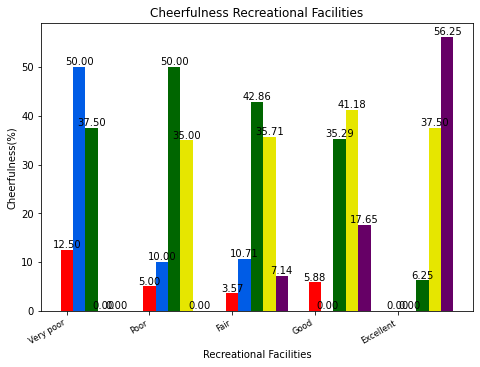

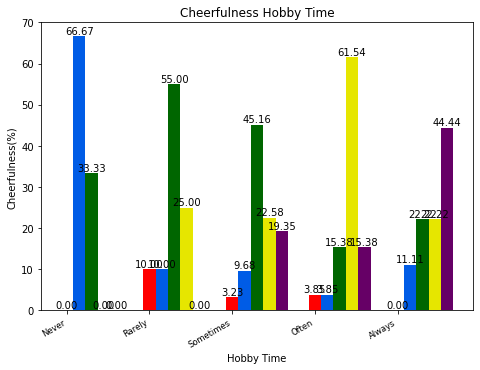

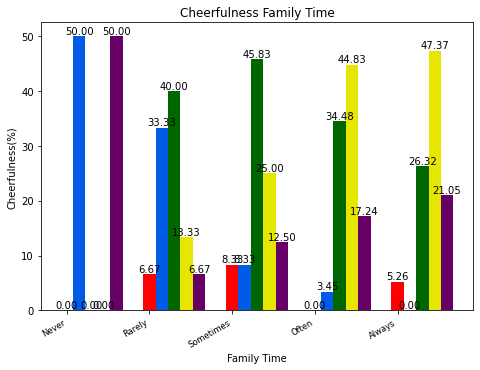

In [2]:
teamRelated=[
    {'name': 'Recreational Facilities', 'encoding': dict((v,k) for k,v in {'Very poor': 1, 'Poor': 2, 
                                                                   'Fair':3, 'Good':4, 
                                                                   'Excellent':5}.items())},
    {'name': 'Hobby Time', 'encoding': dict((v,k) for k,v in {'Never': 1, 'Rarely': 2, 
                                                                   'Sometimes':3, 'Often':4, 
                                                                   'Always':5}.items())},
    {'name': 'Family Time', 'encoding': dict((v,k) for k,v in {'Never': 1, 'Rarely': 2, 
                                                                   'Sometimes':3, 'Often':4, 
                                                                   'Always':5}.items())},
]

productivity_type = sorted(dataset['Cheerfulness'].unique())

for x in teamRelated:
    data = []
    bar_col = x['name']
    barcol_unique = sorted(dataset[bar_col].unique())

    for prod_type in productivity_type:
        bar_data = []
        for bar in barcol_unique:
            a = dataset[dataset[bar_col] == bar]
            query_result = a[a['Cheerfulness'] == prod_type]

#         query_result = pd.merge(a, b, how='inner', on=[bar_col, 'Productivity Level']).dropna(inplace=True)
        #print("query result*****")
        #print(query_result)
        
    #     print(prod_data)
            bar_data.append((query_result.shape[0]/a.shape[0]) * 100.0)
        #print(bar_data)
        data.append(bar_data)
#print("data***")
    #print(data)

    X = np.arange(dataset[bar_col].nunique())
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    plt.xticks(range(len(barcol_unique)), x['encoding'].values() if len(x['encoding'].keys()) > 0 else range(len(barcol_unique)), size='small')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

#     plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off
#     ax.set_xticklabels(range((len(barcol_unique))))

    colorlist=['#ff0000','#005ce6','#006600','#e6e600','#660066','ff9933']
    wid=0.15
    
    bar_list = []
    for i in range(0,5):
        bar_list.append(ax.bar(X + wid*i, data[i], color = colorlist[i], width = wid))
        
        
        
    for bar in bar_list:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom', fontsize=10)
#     labels = x['encoding']    
#     rects = ax.patches
#     for rect, encoding_label in zip(rects, barcol_unique):
#         height = rect.get_height()        
         
#         ax.text(rect.get_x() + rect.get_width(), height -2, labels[encoding_label] if len(labels.keys()) > 0 else encoding_label,
#                 ha='center', va='bottom')
    #ax.bar(X + 0.00, data[0], color = '#ff0000', width = 0.15)
    #ax.bar(X + 0.15, data[1], color = '#005ce6', width = 0.15)
    #ax.bar(X + 0.30, data[2], color = '#006600', width = 0.15)
    #ax.bar(X + 0.45, data[3], color = '#e6e600', width = 0.15)
    #ax.bar(X + 0.60, data[4], color = '#660066', width = 0.15)
    plt.xlabel(x['name'])
    plt.ylabel('Cheerfulness(%)')
    plt.title('Cheerfulness '+str(x['name']))